In [86]:
import os

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%load_ext autoreload
%autoreload 2
import refresh_ergast
import ergast_loader
import data_tools
import style

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# refresh_ergast.refresh()
ergast = ergast_loader.ErgastLoader('data//ergast_data')

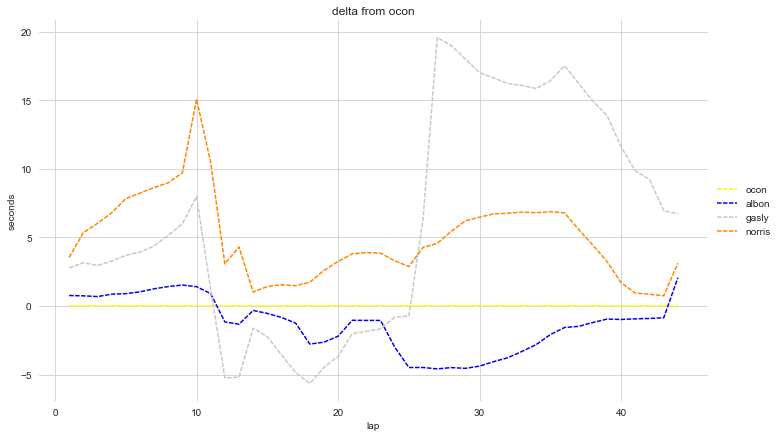

In [107]:
raceId = 1037
tgt_driver = 'ocon'
delta_table = data_tools.make_delta_table(
    ergast,
    raceId=raceId,
    tgt_driver=tgt_driver,
    driver_refs=['ocon', 'albon', 'norris', 'gasly'],    
)

fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(
    data=delta_table,
    x='lap',
    y='delta_seconds',
    hue='driverRef',
    palette=data_tools.get_driver_color_dict(ergast, raceId, key='ref'),
    style='driverRef',
    dashes=style.dashes_2020,
    ax=ax)

ax.set(xlabel='lap', ylabel='seconds', title='delta from ' + tgt_driver)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# seaborn specific remove legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[1:], # remove seaborn default legend title
    labels=labels[1:],   # remove seaborn default legend title
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
plt.show()

In [100]:
pd.merge(
    left=ergast.data['results'].tail(20),
    right=ergast.data['drivers'][['driverId', 'driverRef', 'code']],
    on='driverId'
)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,code
0,24746,1037,1,131,44,1,1,1,1,25.0,44,1:24:08.761,5048761,28,2,1:47.758,233.990,1,hamilton,HAM
1,24747,1037,822,131,77,2,2,2,2,18.0,44,+8.448,5057209,27,5,1:47.983,233.503,1,bottas,BOT
2,24748,1037,830,9,33,3,3,3,3,15.0,44,+15.455,5064216,27,8,1:48.305,232.809,1,max_verstappen,VER
3,24749,1037,817,4,3,4,4,4,4,13.0,44,+18.877,5067638,44,1,1:47.483,234.589,1,ricciardo,RIC
4,24750,1037,839,4,31,6,5,5,5,10.0,44,+40.650,5089411,44,10,1:48.540,232.305,1,ocon,OCO
5,24751,1037,848,9,23,5,6,6,6,8.0,44,+42.712,5091473,27,12,1:48.736,231.886,1,albon,ALB
6,24752,1037,846,1,4,10,7,7,7,6.0,44,+43.774,5092535,39,11,1:48.552,232.279,1,norris,NOR
7,24753,1037,842,213,10,12,8,8,8,4.0,44,+47.371,5096132,29,3,1:47.839,233.815,1,gasly,GAS
8,24754,1037,840,211,18,9,9,9,9,2.0,44,+52.603,5101364,34,13,1:49.136,231.036,1,stroll,STR
9,24755,1037,815,211,11,8,10,10,10,1.0,44,+53.179,5101940,20,9,1:48.389,232.628,1,perez,PER
